<a href="https://colab.research.google.com/github/satyam-tomar/neural-networks/blob/main/sentiment_classification_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Classification — Embedding + LSTM/CNN



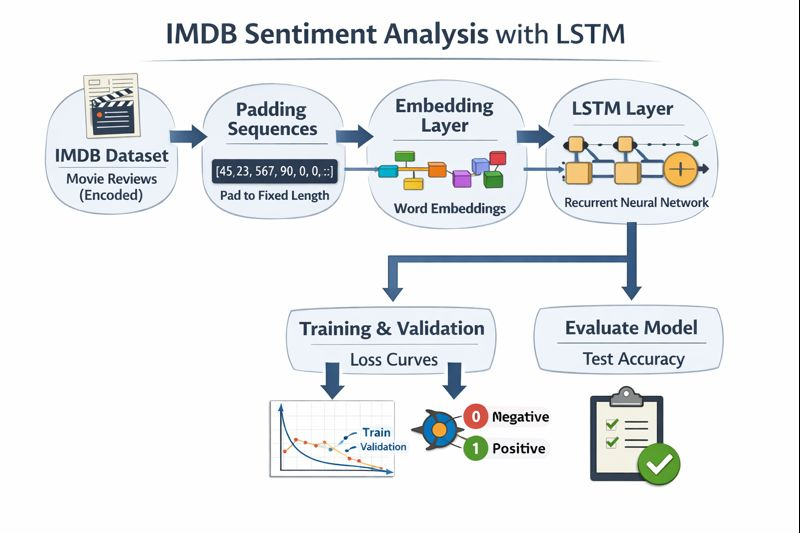

In [9]:
from IPython.display import Image, display
display(Image("Embedding+LSTM.png"))



| Step | Approach | Description | Details / Notes |
| --- | --- | --- | --- |
| 1 | Baseline | Bag-of-words + Dense layer | Convert text to a bag-of-words vector, feed into a simple dense neural network. Fast to train, provides a basic benchmark, but ignores word order and context. Useful to compare improvements from later models. |
| 2 | RNN / CNN | Embedding + LSTM or CNN | Map words to embeddings, then process with LSTM (captures sequential dependencies) or 1D CNN (captures local patterns). Handles context better than bag-of-words and improves accuracy on longer sentences. Moderate training time. |
| 3 | Transformer | Small transformer-based model | Uses attention mechanisms to capture relationships between all words in a sequence simultaneously. Can be implemented with libraries like Hugging Face. Provides best performance for nuanced sentiment, supports pretraining, mirrors MNIST → TensorFlow progression in sophistication. |

This notebook demonstrates a sentiment analysis project using the IMDB movie reviews dataset. The goal is to classify a review as positive or negative using a deep learning model based on word embeddings and an LSTM network.

We begin by importing the required libraries. NumPy is used for numerical operations, Matplotlib for visualization, and TensorFlow/Keras for loading data, preprocessing text, and building the neural network.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, layers

The IMDB dataset is already preprocessed and integer-encoded. Each movie review is represented as a sequence of word indices, where each index corresponds to a word in a fixed-size vocabulary.

In [11]:
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

Neural networks like LSTMs require inputs of equal length. To achieve this, all review sequences are padded or truncated to a fixed length so they can be processed in batch form.

In [12]:
maxlen = 500

x_train = pad_sequences(train_data, maxlen=maxlen)
x_test  = pad_sequences(test_data, maxlen=maxlen)

The model starts with an Embedding layer, which converts word indices into dense vector representations. These embeddings help the model capture semantic meaning between words during training.

An LSTM layer is used next to learn sequential patterns in the text. It is well-suited for language data because it can retain important information over long sequences.

The final Dense layer with a sigmoid activation outputs a probability value between 0 and 1, indicating whether a review is negative or positive.

The model is compiled using the Adam optimizer and binary cross-entropy loss, which are commonly used for binary classification problems.

In [13]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

During training, the model learns from the training data while a portion is reserved for validation. This helps monitor overfitting and generalization performance.

In [14]:
history = model.fit(
    x_train,
    train_labels,
    epochs=6,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 608ms/step - accuracy: 0.6966 - loss: 0.5434 - val_accuracy: 0.8576 - val_loss: 0.3468
Epoch 2/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 189s 604ms/step - accuracy: 0.8753 - loss: 0.3144 - val_accuracy: 0.8780 - val_loss: 0.3024
Epoch 3/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 187s 596ms/step - accuracy: 0.9306 - loss: 0.1899 - val_accuracy: 0.7818 - val_loss: 0.4623
Epoch 4/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 592ms/step - accuracy: 0.9421 - loss: 0.1597 - val_accuracy: 0.8734 - val_loss: 0.4071
Epoch 5/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 206s 605ms/step - accuracy: 0.9644 - loss: 0.1062 - val_accuracy: 0.8642 - val_loss: 0.4459
Epoch 6/6
313/313 ━━━━━━━━━━━━━━━━━━━━ 187s 597ms/step - accuracy: 0.9735 - loss: 0.0826 - val_accuracy: 0.8662 - val_loss: 0.4800


After training, we visualize the training and validation loss, the model achieves good performance quickly but requires regularization or early stopping. In practice, adding dropout to the LSTM, reducing epochs, or using EarlyStopping would stabilize validation performance.

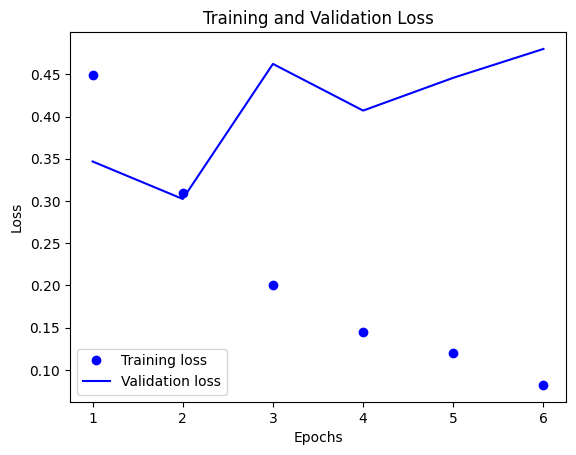

In [15]:
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Finally, the trained model is evaluated on unseen test data to measure its real-world performance.

In [16]:
test_loss, test_acc = model.evaluate(x_test, test_labels)
print("Test Accuracy:", test_acc)


782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.8573 - loss: 0.5036
Test Accuracy: 0.855679988861084
